In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import pandas as pd

In [52]:
orig_data = pd.read_csv('hirability_balanced.csv').fillna(0)
data = pd.read_csv('hirability_balanced.csv').fillna(0)

data.pop("country")
data.head()

,has_bio,has_blog,followers,followings,commits,public_gist,public_repos,hirable
0,0,0,9,10,12.0,0,18,0
1,0,0,0,0,5.0,0,1,0
2,0,0,1,3,36.0,0,5,0
3,0,1,9,8,55.0,1,9,0
4,0,0,3,4,0.0,0,3,0


In [53]:
data = pd.get_dummies(data, drop_first=True)

In [54]:
data['hirable'].value_counts()

0    1250
1    1250
Name: hirable, dtype: int64

In [55]:
column_to_move = data.pop("hirable")
data.insert(0, "hirable", column_to_move)

X = data.iloc[0:, 1:]
y = data.iloc[0:, 0:1]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train) 

In [57]:
y_pred = classifier.predict(X_test)
classification_report = classification_report(y_test,y_pred)

print('Accuracy:',classification_report)

Accuracy:               precision    recall  f1-score   support

           0       0.59      0.71      0.64       243
           1       0.66      0.53      0.58       257

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.61       500
weighted avg       0.62      0.62      0.61       500



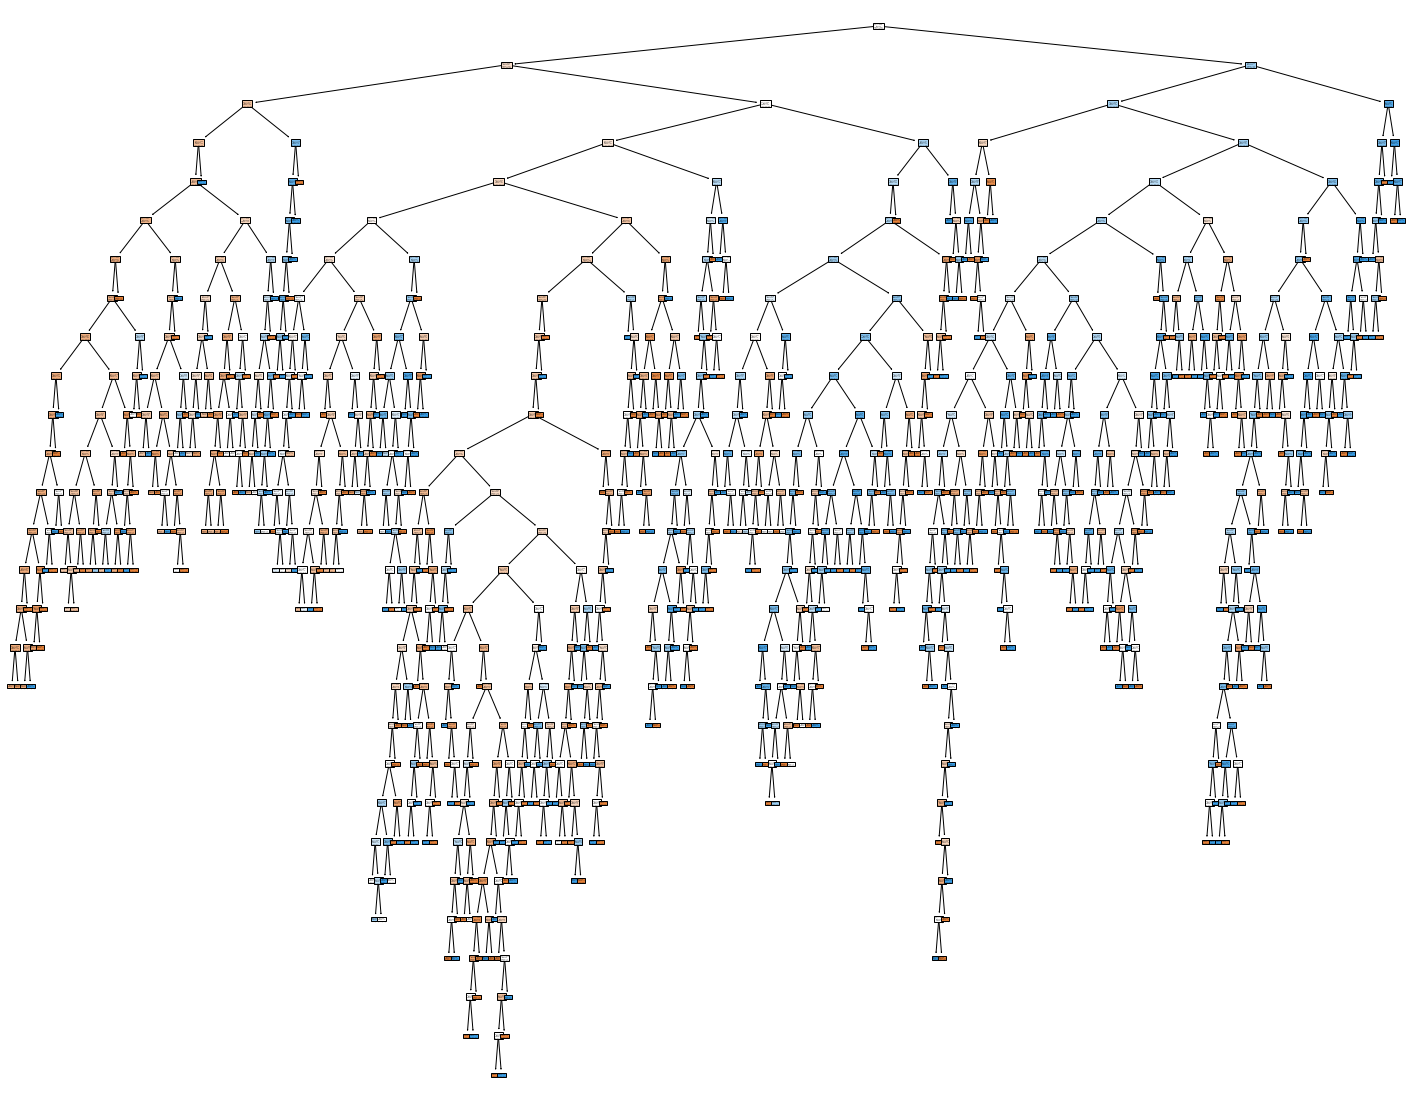

In [58]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(
    classifier,
    filled=True
)